##########################################################
#### File: RattanavilayThip_Project_Milestone_3<br>
#### Name: Thip Rattanavilay<br>
#### Date: 05/6/2021<br>
#### Course: DSC 540 - Project Milestone 3<br>
##########################################################

# Cleaning/Formatting Website Data

In [1]:
import requests
import lxml.html as lh
import pandas as pd
import csv
import requests
from bs4 import BeautifulSoup


In [2]:
#Sending request to the website so I can start to pull back data
url = 'https://www.worldometers.info/coronavirus/#countries'
page = requests.get(url)
print(page.status_code) #Checking the http response status code. Should be 200

200


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 5,779,327 Cases and 356,732 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/
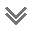

In [3]:
#Used Beautiful Soup to pull in website data, but this is the full website nothing specific
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

In [4]:
#Looking for all tables on the website
all_tables=soup.find_all("table")
all_tables
#Calling out the specific table that I want to use. This part was tricky as it had verbose looking class name, but turns out it was literally just table
right_table = soup.find('table',{'class':'table'})
right_table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;">
<thead>
<tr>
<th>#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>1,951,096</td>
<td>+24,718</td>
<td>118,248</td>
<

In [5]:
#Used the book for reference on how to get the column headers
col_headers = [th.getText() for th in right_table.findAll('th')]
col_headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent']

In [6]:
#Now I need to get all the data from the tables
data = [ [ td.text for td in tr.find_all("td") ] for tr in right_table.find_all("tr")]
data #This pulled all of the continents that were shown as tabs in the table as well as the piece I want

[[],
 ['',
  '\nNorth America\n',
  '1,951,096',
  '+24,718',
  '118,248',
  '+2,085',
  '606,305',
  '1,226,543',
  '18,228',
  '',
  '',
  '',
  '',
  '',
  'North America'],
 ['',
  '\nSouth America\n',
  '716,073',
  '+32,331',
  '35,323',
  '+1,399',
  '287,484',
  '393,266',
  '11,035',
  '',
  '',
  '',
  '',
  '',
  'South America'],
 ['',
  '\nEurope\n',
  '1,950,083',
  '+16,002',
  '170,631',
  '+1,030',
  '931,561',
  '847,891',
  '9,518',
  '',
  '',
  '',
  '',
  '',
  'Europe'],
 ['',
  '\nAsia\n',
  '1,026,155',
  '+23,237',
  '28,681',
  '+466',
  '604,001',
  '393,473',
  '13,749',
  '',
  '',
  '',
  '',
  '',
  'Asia'],
 ['',
  '\nAfrica\n',
  '126,452',
  '+4,905',
  '3,710',
  '+97',
  '52,528',
  '70,214',
  '348',
  '',
  '',
  '',
  '',
  '',
  'Africa'],
 ['',
  '\nOceania\n',
  '8,747',
  '+6',
  '124',
  '+1',
  '8,129',
  '494',
  '6',
  '',
  '',
  '',
  '',
  '',
  'Australia/Oceania'],
 ['', '\n\n', '721', '', '15', '', '651', '55', '4', '', '', '', '', 

In [7]:
#I don't need the overall continent data I really just need the world data then all of the countries listed. So I'm going to drop the first 8 rows so I'm only seeing the specifics I want
n = 8
mydata = data[n:]
mydata

[['',
  'World',
  '5,779,327',
  '+101,199',
  '356,732',
  '+5,078',
  '2,490,659',
  '2,931,936',
  '52,888',
  '741',
  '45.8',
  '',
  '',
  '',
  'All'],
 ['1',
  'USA',
  '1,744,276',
  '+19,019',
  '102,009 ',
  '+1,437',
  '486,112',
  '1,156,155',
  '17,082',
  '5,273',
  '308',
  '15,822,759',
  '47,829',
  '330,817,010 ',
  'North America'],
 ['2',
  'Brazil',
  '411,821',
  '+19,461',
  '25,598 ',
  '+1,049',
  '166,647',
  '219,576',
  '8,318',
  '1,939',
  '121',
  '871,839',
  '4,104',
  '212,413,908 ',
  'South America'],
 ['3',
  'Russia',
  '370,680',
  '+8,338',
  '3,968 ',
  '+161',
  '142,208',
  '224,504',
  '2,300',
  '2,540',
  '27',
  '9,415,992',
  '64,525',
  '145,928,655 ',
  'Europe'],
 ['4',
  'Spain',
  '283,849',
  '+510',
  '27,118 ',
  '+1',
  '196,958',
  '59,773',
  '854',
  '6,071',
  '580',
  '3,556,567',
  '76,071',
  '46,753,098 ',
  'Europe'],
 ['5',
  'UK',
  '267,240',
  '+2,013',
  '37,460 ',
  '+412',
  'N/A',
  'N/A',
  '1,559',
  '3,939',

In [8]:
#Now that I have all of the data I want specifically I'm going to create a dataframe from the headers and mydata
df_cov19 = pd.DataFrame(mydata, columns = col_headers)
df_cov19.head(20)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
0,,World,"5,779,327","+101,199","356,732","+5,078","2,490,659","2,931,936","52,888",741,45.8,,,,All
1,1,USA,"1,744,276","+19,019","102,009","+1,437","486,112","1,156,155","17,082","5,273",308,"15,822,759","47,829","330,817,010",North America
2,2,Brazil,"411,821","+19,461","25,598","+1,049","166,647","219,576","8,318","1,939",121,"871,839","4,104","212,413,908",South America
3,3,Russia,"370,680","+8,338","3,968",+161,"142,208","224,504","2,300","2,540",27,"9,415,992","64,525","145,928,655",Europe
4,4,Spain,"283,849",+510,"27,118",+1,"196,958","59,773",854,"6,071",580,"3,556,567","76,071","46,753,098",Europe
5,5,UK,"267,240","+2,013","37,460",+412,N/A,N/A,"1,559","3,939",552,"3,798,490","55,982","67,852,019",Europe
6,6,Italy,"231,139",+584,"33,072",+117,"147,101","50,966",505,"3,822",547,"3,607,251","59,654","60,469,988",Europe
7,7,France,"182,913",+191,"28,596",+66,"66,584","87,733","1,501","2,803",438,"1,384,633","21,217","65,259,974",Europe
8,8,Germany,"181,895",+607,"8,533",+35,"162,800","10,562",763,"2,172",102,"3,952,971","47,195","83,758,696",Europe
9,9,Turkey,"159,797","+1,035","4,431",+34,"122,793","32,573",723,"1,897",53,"1,894,650","22,488","84,249,900",Asia


In [9]:
#Most of this is numeric data and I don't want to see NA those numbers. I'm going to fill in N/A with 0
df_cov19.replace(to_replace = 'N/A', value = 0)  
#Now we can see the N/A that was in UK under TotalRecovered has been switched to a 0. Of course now I'm noticing something funky with the end rows so I need to take a look at those

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
0,,World,"5,779,327","+101,199","356,732","+5,078","2,490,659","2,931,936","52,888",741,45.8,,,,All
1,1,USA,"1,744,276","+19,019","102,009","+1,437","486,112","1,156,155","17,082","5,273",308,"15,822,759","47,829","330,817,010",North America
2,2,Brazil,"411,821","+19,461","25,598","+1,049","166,647","219,576","8,318","1,939",121,"871,839","4,104","212,413,908",South America
3,3,Russia,"370,680","+8,338","3,968",+161,"142,208","224,504","2,300","2,540",27,"9,415,992","64,525","145,928,655",Europe
4,4,Spain,"283,849",+510,"27,118",+1,"196,958","59,773",854,"6,071",580,"3,556,567","76,071","46,753,098",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,,Total:,"1,026,155","+23,237","28,681",+466,"604,001","393,473","13,749",,,,,,Asia
220,,Total:,"126,452","+4,905","3,710",+97,"52,528","70,214",348,,,,,,Africa
221,,Total:,"8,747",+6,124,+1,"8,129",494,6,,,,,,Australia/Oceania
222,,Total:,721,,15,,651,55,4,,,,,,


In [10]:
#Going to look at the last 10 rows 
df_cov19.tail(10)
#It looks like I may still have the continent data here so I need to get rid of rows 215-221

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
214,214,Saint Pierre Miquelon,1,,,,1,0,,173,,,,"5,797",North America
215,215,China,"82,993",+1,"4,634",,"78,280",79,5,58,3,,,"1,439,323,776",Asia
216,,Total:,"1,951,096","+24,718","118,248","+2,085","606,305","1,226,543","18,228",,,,,,North America
217,,Total:,"716,073","+32,331","35,323","+1,399","287,484","393,266","11,035",,,,,,South America
218,,Total:,"1,950,083","+16,002","170,631","+1,030","931,561","847,891","9,518",,,,,,Europe
219,,Total:,"1,026,155","+23,237","28,681",+466,"604,001","393,473","13,749",,,,,,Asia
220,,Total:,"126,452","+4,905","3,710",+97,"52,528","70,214",348,,,,,,Africa
221,,Total:,"8,747",+6,124,+1,"8,129",494,6,,,,,,Australia/Oceania
222,,Total:,721,,15,,651,55,4,,,,,,
223,,Total:,"5,779,327","+101,199","356,732","+5,078","2,490,659","2,931,936","52,888",741.4,45.8,,,,All


In [11]:
#Using drop and calling out the rows I need to remove specifically
df_cov19 = df_cov19.drop([215, 216, 217, 218, 219, 220, 221], axis=0)
df_cov19.tail(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
207,207,Western Sahara,9,,1,,6,2,,15,2,,,"595,784",Africa
208,208,British Virgin Islands,8,,1,,7,0,,265,33,167,"5,528","30,212",North America
209,209,Papua New Guinea,8,,,,8,0,,0.9,,"2,402",269,"8,929,617",Australia/Oceania
210,210,Caribbean Netherlands,6,,,,6,0,,229,,424,"16,184","26,199",North America
211,211,St. Barth,6,,,,6,0,,608,,137,"13,875","9,874",North America
212,212,Anguilla,3,,,,3,0,,200,,30,"2,001","14,990",North America
213,213,Lesotho,2,,,,,2,,0.9,,283,132,"2,140,606",Africa
214,214,Saint Pierre Miquelon,1,,,,1,0,,173,,,,"5,797",North America
222,,Total:,721,,15,,651,55,4,,,,,,
223,,Total:,"5,779,327","+101,199","356,732","+5,078","2,490,659","2,931,936","52,888",741.4,45.8,,,,All


In [12]:
#Need to reset the index as my rows at the end show 214 China and then 222. 
df_cov19 = df_cov19.reset_index(drop = True)
df_cov19 #Now the rows at the end look correct and are associated to correct row number.

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
0,,World,"5,779,327","+101,199","356,732","+5,078","2,490,659","2,931,936","52,888",741,45.8,,,,All
1,1,USA,"1,744,276","+19,019","102,009","+1,437","486,112","1,156,155","17,082","5,273",308,"15,822,759","47,829","330,817,010",North America
2,2,Brazil,"411,821","+19,461","25,598","+1,049","166,647","219,576","8,318","1,939",121,"871,839","4,104","212,413,908",South America
3,3,Russia,"370,680","+8,338","3,968",+161,"142,208","224,504","2,300","2,540",27,"9,415,992","64,525","145,928,655",Europe
4,4,Spain,"283,849",+510,"27,118",+1,"196,958","59,773",854,"6,071",580,"3,556,567","76,071","46,753,098",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,Anguilla,3,,,,3,0,,200,,30,"2,001","14,990",North America
213,213,Lesotho,2,,,,,2,,0.9,,283,132,"2,140,606",Africa
214,214,Saint Pierre Miquelon,1,,,,1,0,,173,,,,"5,797",North America
215,,Total:,721,,15,,651,55,4,,,,,,


In [13]:
df_cov19.to_csv('covid_clean_data2.csv')